# Statistical learning (IMC-4302C)


In this lab, you are invited to work on image processing using some unsupervised learning algorithm. First, you should use principal analysis component (PCA) to project the intensity of each pixel from 3 dimensional space (RGB) to a two dimensional space containing the two first principal component.
Then, you should use $k$-means clustering to create 16 clusters of colors and replace each pixel color by the the color of the cluster (centroid) the original color belongs to it. Hence, the output image will contains only 16 colors. This helps to reduce the size that the image require to be stored and it gives the effect of a cartoonizer filter. Finally you should compare between these two methods used for image compression by comparing the compression ration and the distortion (difference with the original image).
N.B: Try to use small images with no high resolution to reduce computation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

>Load [bird_small.png](https://who.roca.inria.fr/Kevin.Zagalo/docs/IMC-4302C/lab5/bird_small.png) or use any other small image, show it and print its dimensions.

width : 128, height : 128, channels : 3


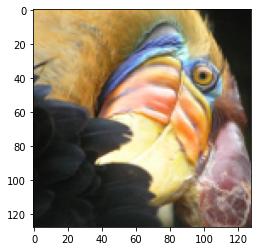

In [13]:
img = plt.imread('bird_small.png')
plt.imshow(img)

n, m, c = img.shape
print('width : {}, height : {}, channels : {}'.format(n, m, c))

>Visualize in 3 dimension space 1000 pixels randomly selected from the whole image. The 3D plot should have 3 axes that represent the intensity in each pixel of R: red, G: green and B: blue.

<ipython-input-30-8ff15738d6fc>:7: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = fig.gca(projection='3d')


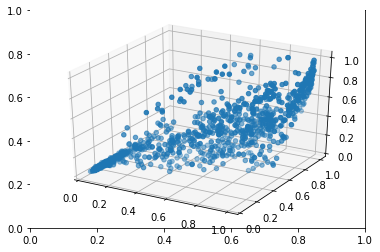

[[[0.85882354 0.7058824  0.40392157]
  [0.9019608  0.7254902  0.45490196]
  [0.8862745  0.7294118  0.43137255]
  ...
  [0.05490196 0.05882353 0.05098039]
  [0.05098039 0.05882353 0.04705882]
  [0.04705882 0.05490196 0.04705882]]

 [[0.9019608  0.75686276 0.46666667]
  [0.8784314  0.7529412  0.47058824]
  [0.8862745  0.7529412  0.4862745 ]
  ...
  [0.0627451  0.0627451  0.05098039]
  [0.05490196 0.05882353 0.03921569]
  [0.04313726 0.05490196 0.03529412]]

 [[0.89411765 0.7490196  0.48235294]
  [0.89411765 0.7490196  0.4745098 ]
  [0.8627451  0.7254902  0.4627451 ]
  ...
  [0.05490196 0.0627451  0.05098039]
  [0.05098039 0.05098039 0.04313726]
  [0.04313726 0.05882353 0.03921569]]

 ...

 [[0.05882353 0.07058824 0.0627451 ]
  [0.07058824 0.08235294 0.07058824]
  [0.07058824 0.07450981 0.0627451 ]
  ...
  [0.31764707 0.1764706  0.1764706 ]
  [0.27450982 0.16862746 0.13725491]
  [0.28235295 0.2        0.16862746]]

 [[0.0627451  0.06666667 0.06666667]
  [0.06666667 0.07058824 0.07450981]


In [30]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['legend.fontsize'] = 10
fig, ax = plt.subplots()

ax = fig.gca(projection='3d')

I, J = np.random.choice(n, size=1000), np.random.choice(m, size=1000)

ax.scatter(img[I, J, 0], img[I, J, 1], img[I, J, 2])
plt.show()

print(img)

## Principal component analysis
>Apply PCA to reduce the number of dimension from 3 (RGB: 3 color for each pixel) to 2 dimension. Recover a 3 dimensions (colors) image from the projected image (2 dimension). Then, calculate the compression ratio and the difference between original image and the recovered image.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(16384, 1)


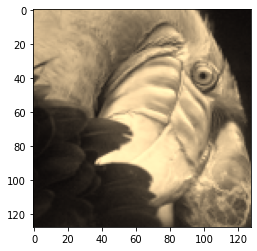

In [29]:
from sklearn.decomposition import PCA

pixels = img.reshape(n*m, 3)

#plt.imshow(pixels.mean(axis=1).reshape(n,m))

pca = PCA(1).fit(pixels)
img_compressed = pca.transform(pixels).reshape(n, m)

plt.imshow(img_compressed)
pixels_compressed = img_compressed.reshape(-1, 1)

print(pixels_compressed.shape)
plt.imshow(pca.inverse_transform(pixels_compressed).reshape(n, m, 3))

$$\Sigma = U \times diag(S) \times V$$

## $k$-Means
>Apply $k$-means clustering to group different colors of the image in 16 cluster. Visualize in 3 dimension space 1000 pixels randomly selected from the whole image. Try to dye pixels in the same clusters with the same color in similar way to the following figure 1.
Figure 1: Pixels clustering visualization


5. Create a processed image by replacing the color of the original pixel with the color of the cluster it belongs to. Then, propose an effective way to store this image with reducing its size. Don’t forget that we only use 16 colors with 3 component (RGB) each and each single pixel is assigned to one of this 16 colors.


6. Calculate the compression ratio and the difference between original image and the processed image. Which method is better for image compression? You may think about perceptual criterion.